In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy

In [76]:
df = pd.read_csv('./Experience-Salary.csv')

In [77]:
df.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [78]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.3)

In [80]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)

The shape of x_train is: (700, 1)
The shape of y_train is:  (700,)


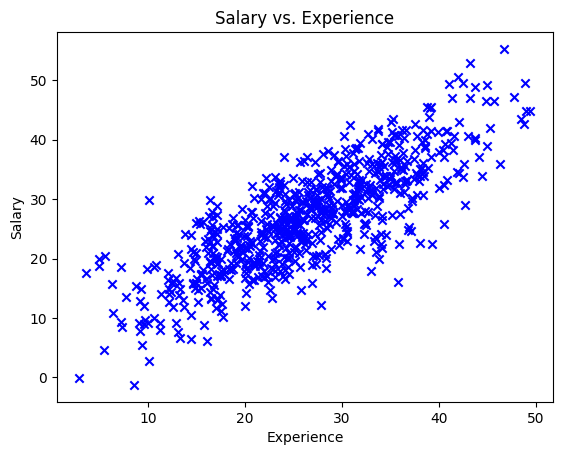

In [81]:
plt.scatter(x_train, y_train, marker='x', c='b') 
plt.title("Salary vs. Experience")
# Set the y-axis label
plt.ylabel('Salary')
# Set the x-axis label
plt.xlabel('Experience')
plt.show()

In [82]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
        to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0

    cost=0
    for i in range(m):
        f_wb = w*x[i]+b
        cost += (f_wb - y[i])**2
    
    total_cost = cost/(2*m)
    return total_cost


In [83]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1


cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f"Cost at initial w (zeros): {cost}")



<class 'numpy.ndarray'>
Cost at initial w (zeros): [422.34046459]


In [84]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
    x (ndarray): Shape (m,) Input to the model (Population of cities) 
    y (ndarray): Shape (m,) Label (Actual profits for the cities)
    w, b (scalar): Parameters of the model  
    Returns
    dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
    dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ### 
    for i in range(m):
        f_wb = w*x[i]+b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i])*x[i]
    dj_dw /= m
    dj_db /= m
    
    ### END CODE HERE ### 
        
    return dj_dw, dj_db

In [85]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): [-764.47985769] [-26.78999893]


In [86]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: [-606.44528705] [-21.34929785]


In [87]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
    x :    (ndarray): Shape (m,)
    y :    (ndarray): Shape (m,)
    w_in, b_in : (scalar) Initial values of parameters of the model
    cost_function: function to compute cost
    gradient_function: function to compute the gradient
    alpha : (float) Learning rate
    num_iters : (int) number of iterations to run gradient descent
    Returns
    w : (ndarray): Shape (1,) Updated values of parameters of the model after
        running gradient descent
    b : (scalar)                Updated value of parameter of the model after
        running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i}: Cost {float(J_history[-1])}")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [88]:
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.001

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration 0: Cost 35.87742712067113
Iteration 150: Cost 14.682162127907832
Iteration 300: Cost 14.636384676439752
Iteration 450: Cost 14.59197518328893
Iteration 600: Cost 14.548892770033781
Iteration 750: Cost 14.507097779814343
Iteration 900: Cost 14.466551740828695
Iteration 1050: Cost 14.427217330919843
Iteration 1200: Cost 14.389058343221311
Iteration 1350: Cost 14.352039652829086
w,b found by gradient descent: [0.97254874] [0.82046589]


In [89]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

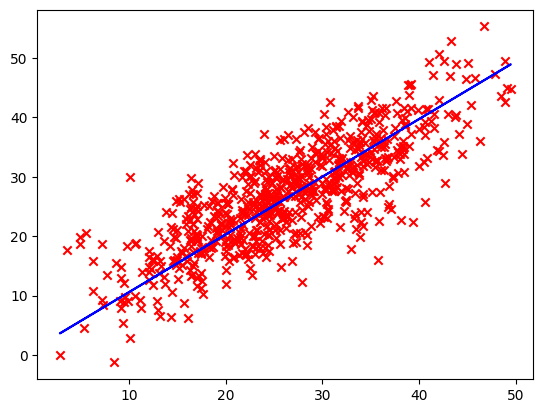

In [90]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

In [91]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [92]:
cm = r2_score(y_train,predicted)
print(cm * 100)
cm = mean_absolute_error(y_train,predicted)
print(cm)
cm = np.sqrt(mean_absolute_error(y_train,predicted))
print(cm)
cm = mean_squared_error(y_train,predicted)
print(cm)

62.710474095000876
4.1906966586508965
2.0471191119841796
28.632726022763762
